<a href="https://www.kaggle.com/code/risakashiwabara/beginner-world-map-plot?scriptVersionId=274265405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://i.postimg.cc/fWHxYRsf/Firefly-55233.jpg)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">  Import Library</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px">　Sample data　</p>

In [2]:
df_month = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by month_ .csv')

In [3]:
df_year = pd.read_csv('/kaggle/input/japannumber-of-visitors-to-japan/Number of foreign visitors to Japan by year_ .csv')

In [4]:
df_detail = pd.read_csv('/kaggle/input/taiwan-earthquake-dataset/earthquake detail.csv')

<a id="3"></a>
# <p style="padding:20px;background-color:#fa8072 ;margin:0;color:#f2e9e4;font-family: 'Times New Roman';font-size:90%;text-align:center;border-radius: 15px 80px;overflow:hidden;font-weight:100 ; border: 2px solid #fefae0; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">Map : folium.Map() </p>

In [5]:
import folium
df = df_detail[df_detail['ML'] >5]
m = folium.Map(location=[23.5, 121], zoom_start=8)
for i, row in df.iterrows():
    if row['depth'] <= 5:
        color = 'red'
    elif 5 < row['depth'] <= 10:
        color = 'orange'
    else:
        color = 'blue'


    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5,
        popup=f"Date: {row['date']} Time: {row['time']}\nDepth: {row['depth']} km",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

display(m)

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> geopandas</p>

In [6]:
import geopandas as gpd

In [7]:
#Porygondata in geometry
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/tmp/ipykernel_20/737382315.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [8]:
#Give a list of countries you want to look up.
countries_to_plot = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central Africa', 'Chad', 'Chile', 'China',
       'Columbia', 'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Germany', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia',
       'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macau',
       'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
       'Marshall', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
       'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria',
       'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan',
       'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
       'Republic of Congo', 'Republic of Kosovo',
       'Republic of South Africa', 'Republic of South Sudan', 'Romania',
       'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
       'Saint Vincent', 'Samoa', 'San Marino', 'Sao Tome and Principe',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Serbia and Montenegro',
       'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia',
       'Solomon', 'Somalia', 'South Korea', 'South Yemen', 'Spain',
       'Sri Lanka', 'Stateless and others', 'Sudan', 'Suriname', 'Sweden',
       'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania',
       'Thailand', 'The Bahamas', 'Togo', 'Tonga', 'Trinidad and Tobago',
       'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Unknown', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican',
       'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']


In [9]:
# world['name']→All Countries　, countries_to_plot→Selected Countries
world_to_plot = world[world['name'].isin(countries_to_plot)]

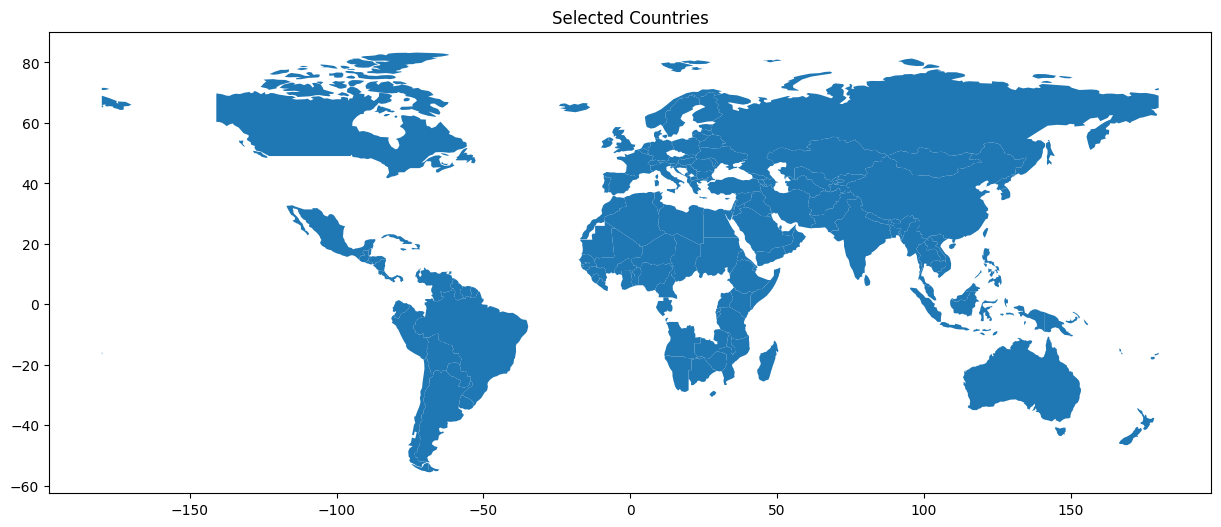

In [10]:
world_to_plot.plot(figsize=(15, 10))
plt.title('Selected Countries')
plt.show()

<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/CL6cTnJM/publicdomainq-0032797.jpg);font-family:camtasia;font-size:120%;color:Black;text-align:center;border-radius:15px 50px; padding:7px"> geopandas-Data for this time</p>

##  grouped sum

In [11]:
df_drop = df_month.drop(['Month ','Year'], axis=1)
grouped = df_drop.groupby('Country/Area')
group_sums = grouped.sum()
group_sum = group_sums.reset_index()
df = group_sum
df

,Country/Area,Visitor
0,Afghanistan,16752
1,Albania,1675
2,Algeria,3945
3,Andorra,780
4,Angola,1226
...,...,...
198,Venezuela,6982
199,Vietnam,1957110
200,Yemen,1610
201,Zambia,2611


## ② Visitor merge in  geopandas

In [12]:
world_to_plot_df = pd.merge(world_to_plot,df , left_on='name', right_on='Country/Area', how='right')
world_to_plot_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country/Area,Visitor
0,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,16752
1,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,1675
2,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,3945
3,NaN,NaN,NaN,NaN,NaN,None,Andorra,780
4,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,1226
...,...,...,...,...,...,...,...,...
198,28515829.0,South America,Venezuela,VEN,482359.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",Venezuela,6982
199,96462106.0,Asia,Vietnam,VNM,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",Vietnam,1957110
200,29161922.0,Asia,Yemen,YEM,22581.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",Yemen,1610
201,17861030.0,Africa,Zambia,ZMB,23309.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,2611


## ③ plot　

To split the values in the 'Visitor' column into 5 bins, you can use the pd.qcut function in Python. The process involves dividing the range of values into intervals, or bins, and assigning each value to the appropriate bin. This is particularly useful when you want to categorize a continuous variable, such as the 'Visitor' column, into discrete groups.

/tmp/ipykernel_20/3760552298.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Oranges',5)


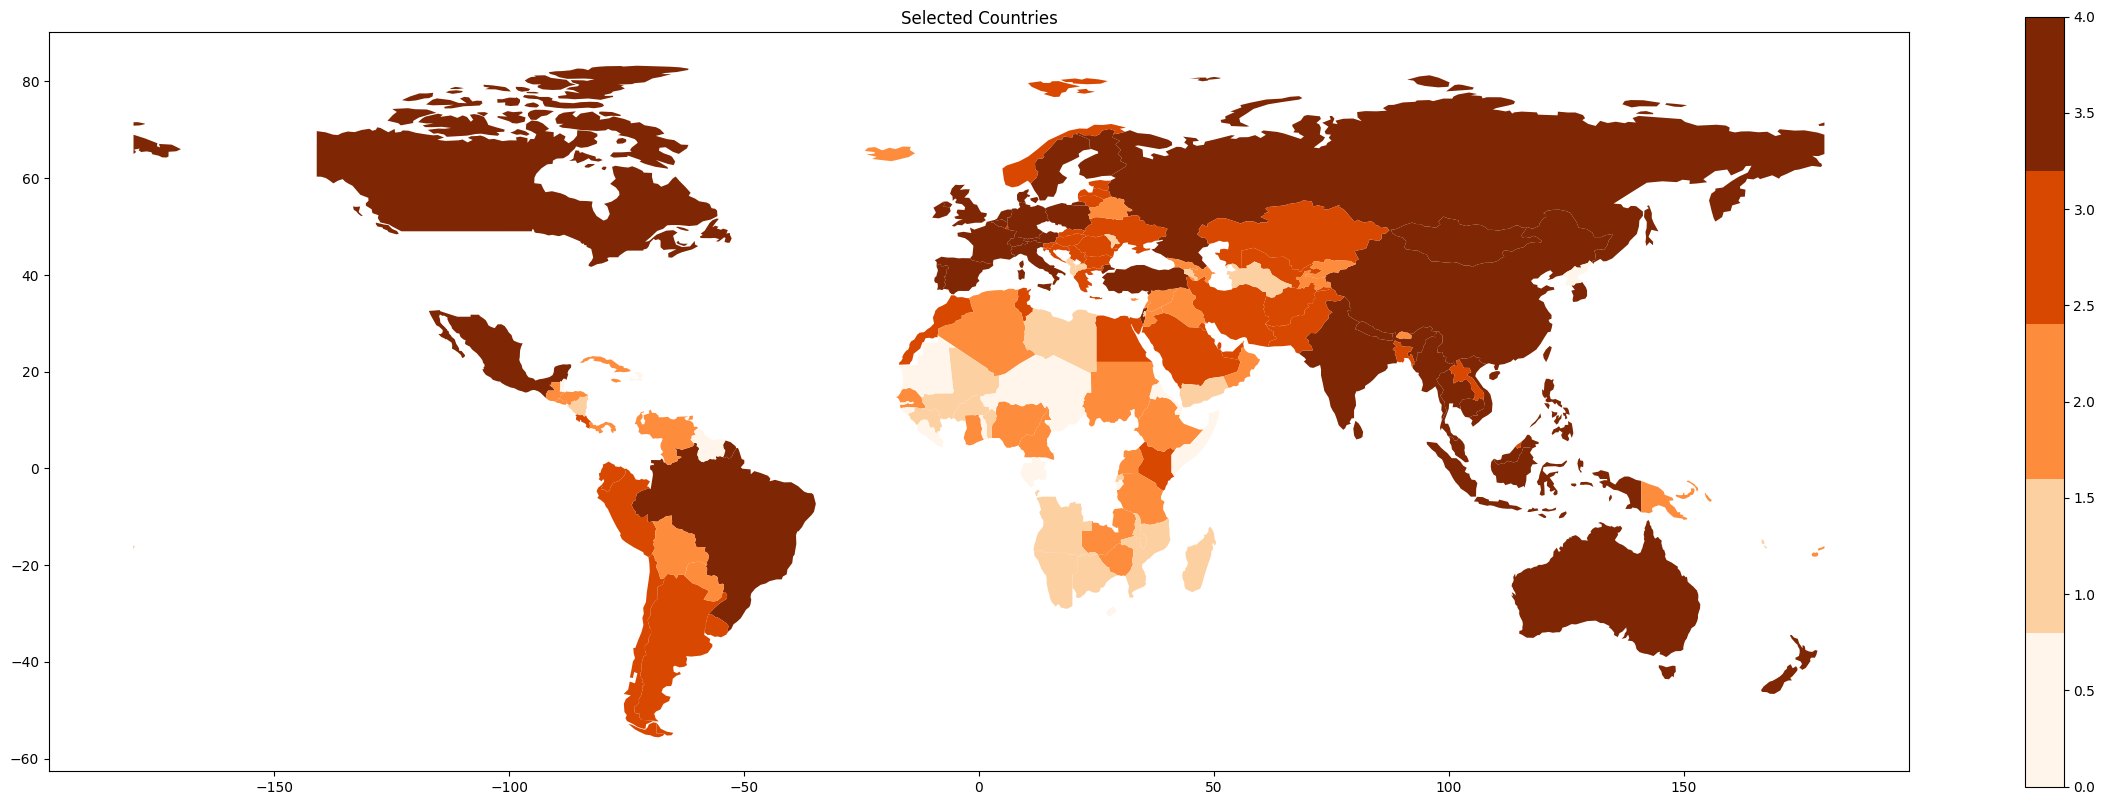

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Sort in descending order
world_to_plot_df_sorted = world_to_plot_df.sort_values(by='Visitor', ascending=False)
# Split 'Visitor' column values into 5 bins
world_to_plot_df_sorted['Visitor_Group'] = pd.qcut(world_to_plot_df_sorted['Visitor'], q=5, labels=False)
# plot
cmap = plt.cm.get_cmap('Oranges',5)
world_to_plot_df_sorted.plot(column='Visitor_Group', legend=True, cmap=cmap,figsize=[30, 10])

plt.title('Selected Countries')
plt.show()

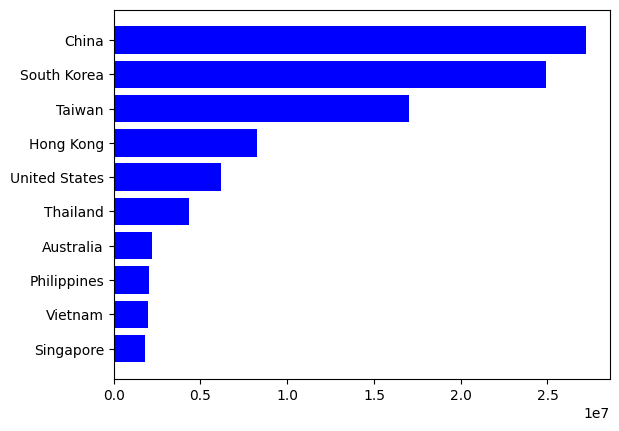

In [14]:
#Top 10 most visited countries
df_drop = df_month.drop(['Month ','Year'], axis=1)
grouped = df_drop.groupby('Country/Area')
group_sums = grouped.sum()
group_sum = group_sums.reset_index()
df = group_sum
def remove_any_zero_row(df):
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df
month_visitor = remove_any_zero_row(df)
month_visitor = month_visitor.sort_values(['Visitor','Country/Area'])
month_ten = month_visitor[-10:]
month_ten
height = month_ten['Visitor']
left = month_ten['Country/Area']
plt.barh(left, height, color='b')
plt.show()

<Axes: xlabel='Year'>

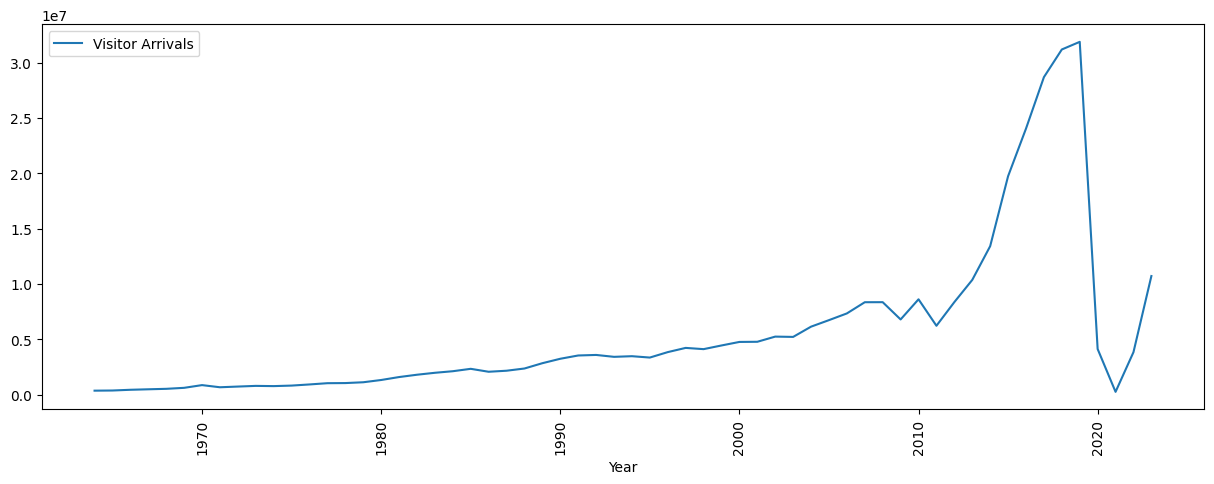

In [15]:
#Number of visits per year
df_y = df_year.set_index('Year')
df_y
plt.figure(figsize=(15,5)) 
plt.xticks(rotation=90) 
sns.lineplot(data=df_y)